<a href="https://colab.research.google.com/github/sophiadto1/Data-Science/blob/main/dela_Torre_Orosz_Final_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tensorspace.org/

In [ ]:
%%capture 
!pip install wandb #importing functions
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):  #setting up pictures from my slides to be displayed
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()} #importing labels

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p" #importing slides with pictures on it 

In [ ]:
url= "https://docs.google.com/presentation/d/16TO-rT4duMVLysvy-7H4FhyPUOMrOvUXlHSKdHenJJA/edit#slide=id.p"

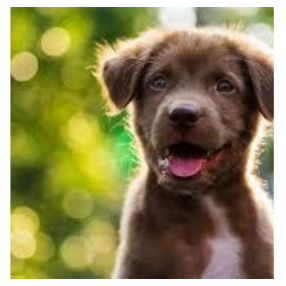

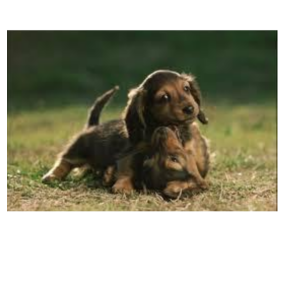

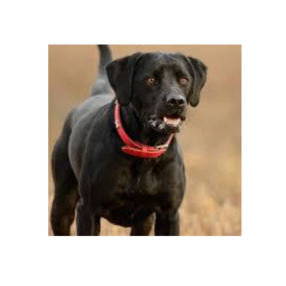

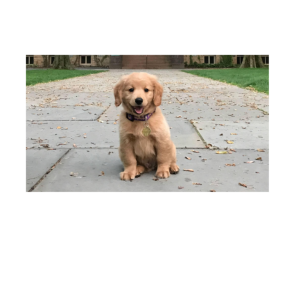

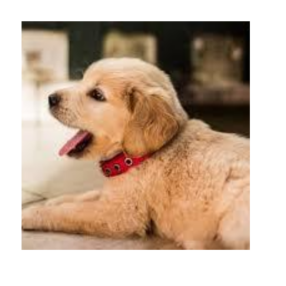

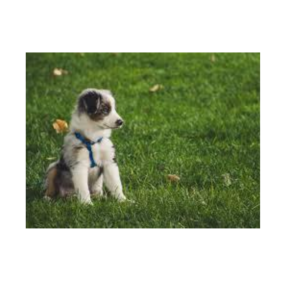

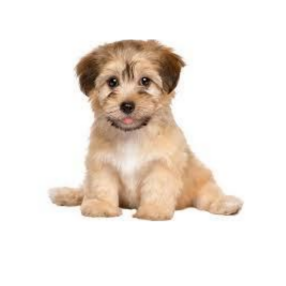

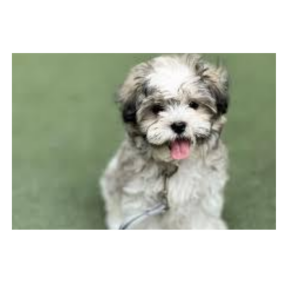

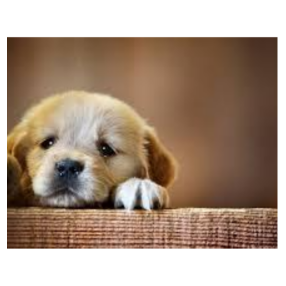

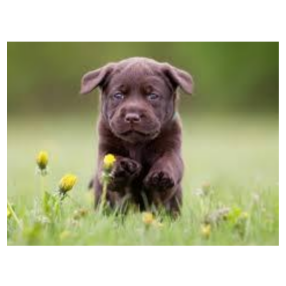

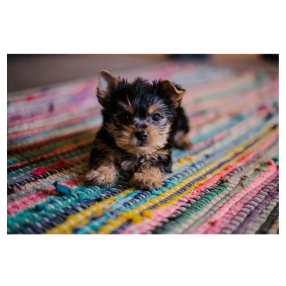

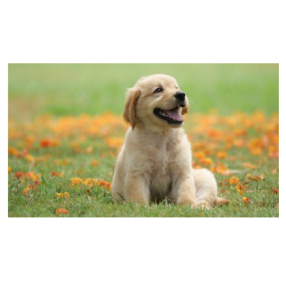

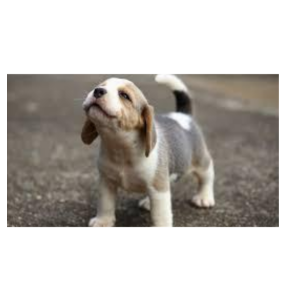

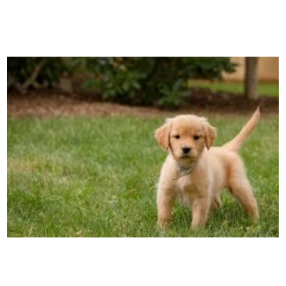

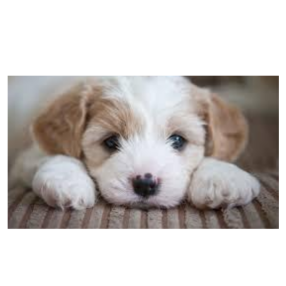

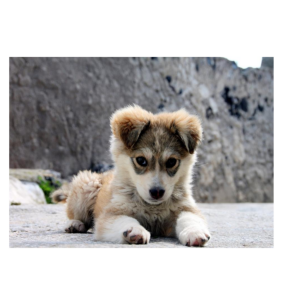

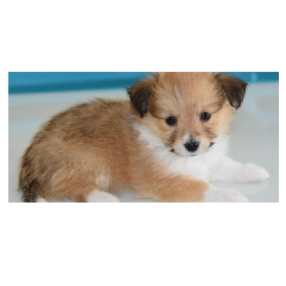

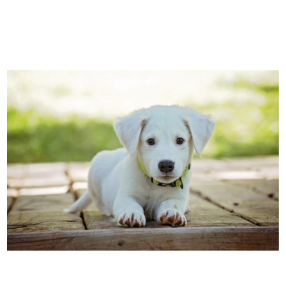

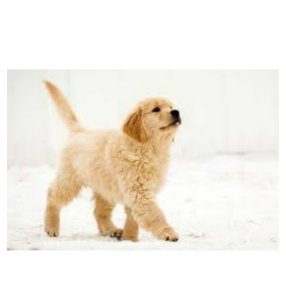

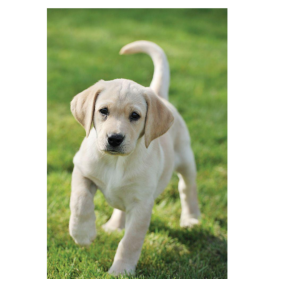

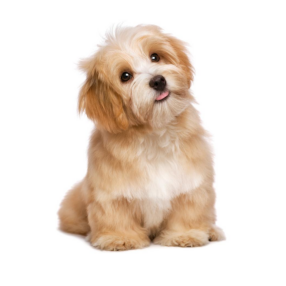

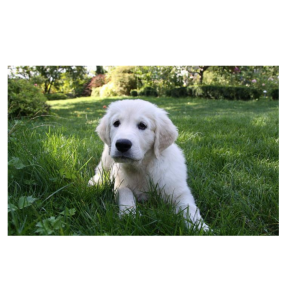

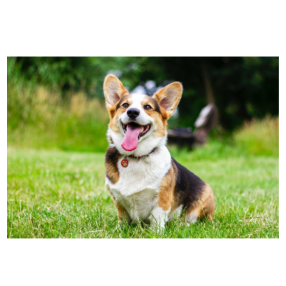

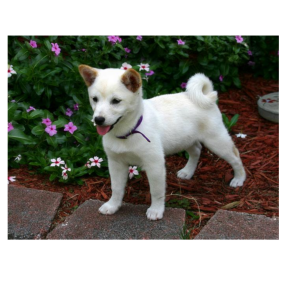

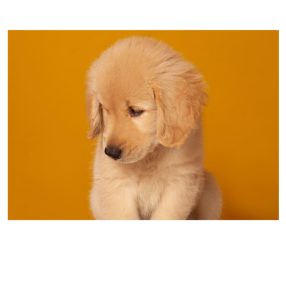

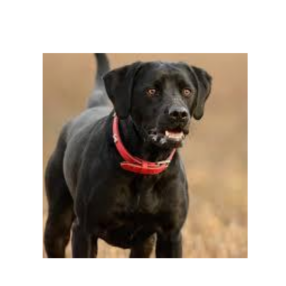

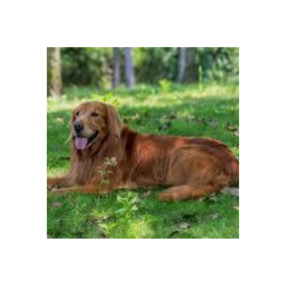

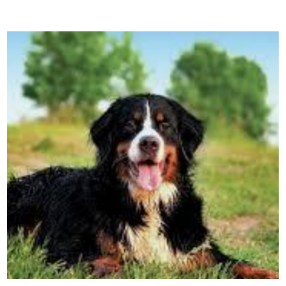

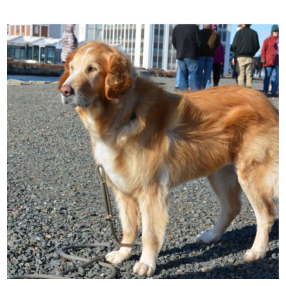

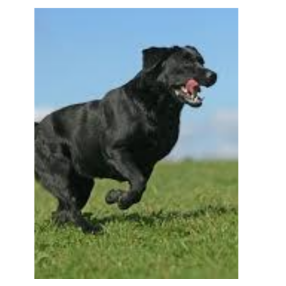

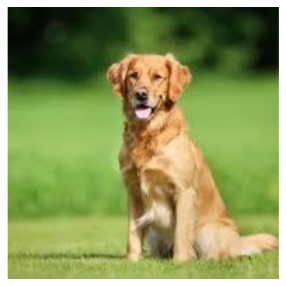

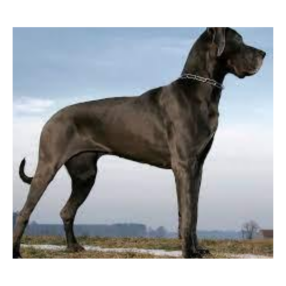

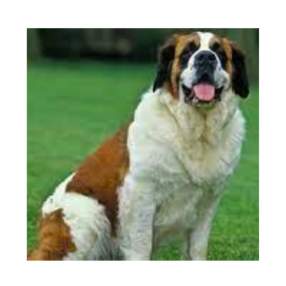

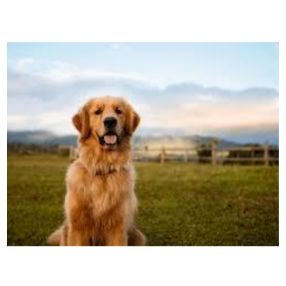

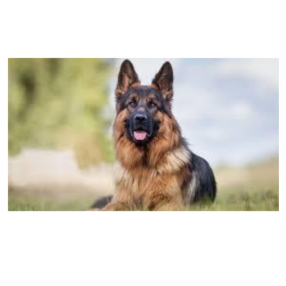

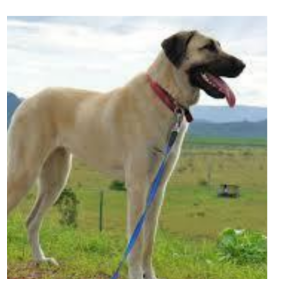

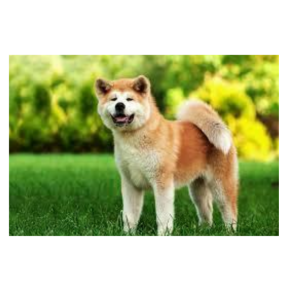

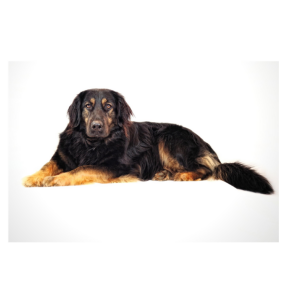

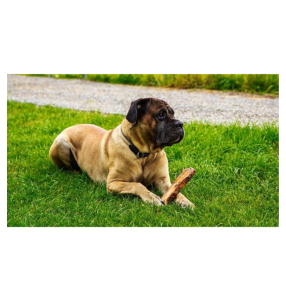

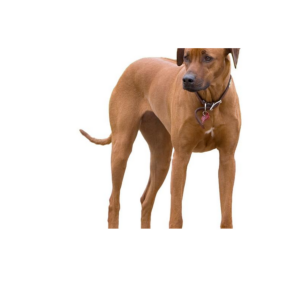

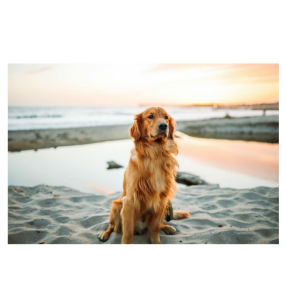

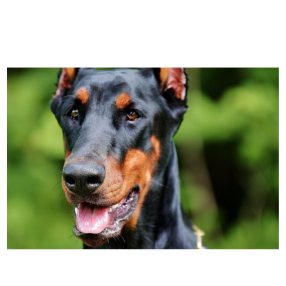

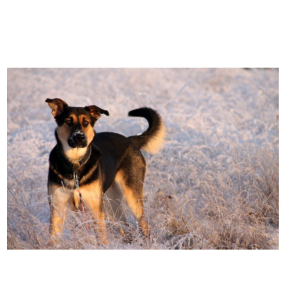

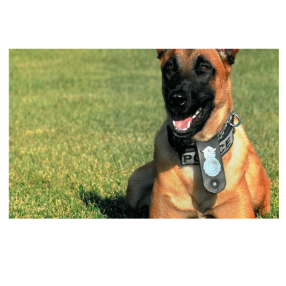

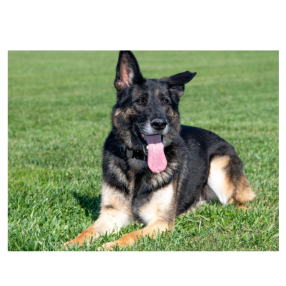

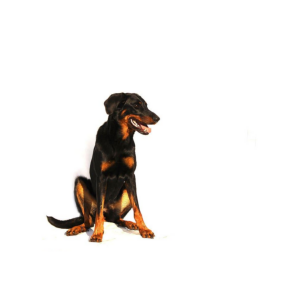

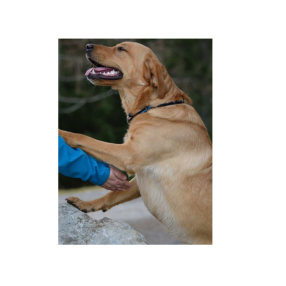

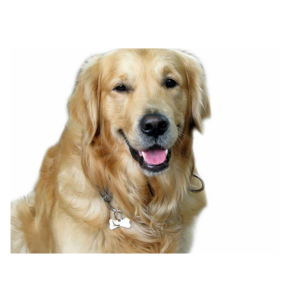

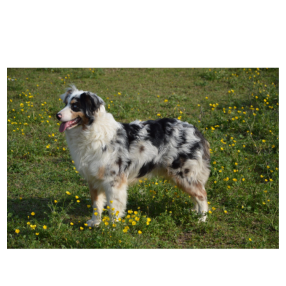

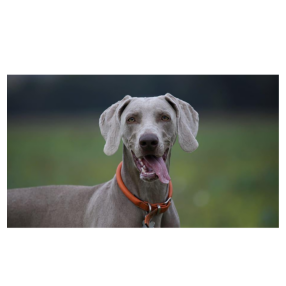

In [ ]:
images = [] #function to display pictures 

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
images.shape #setting up picture size 

torch.Size([50, 3, 224, 224])

In [ ]:
model(images)

tensor([[-2.1611, -3.8682, -3.5391,  ..., -2.9225,  1.3794,  0.5505],
        [-2.1330, -6.3336, -4.6908,  ..., -2.3095, -1.2179, -3.7842],
        [-0.9371, -4.9629, -4.8561,  ..., -3.0523,  0.2219,  1.4359],
        ...,
        [-2.6274, -2.9606, -3.3075,  ..., -3.3579,  1.5545,  4.8710],
        [-4.1240, -0.6258,  1.0665,  ..., -3.0837,  1.0321,  0.3390],
        [-3.2810, -2.8285, -1.1480,  ..., -2.5261, -0.3765,  2.3392]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images) 

In [ ]:
y.shape #setting up shape of picture 

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses): #guesses for what the images are 
    print(labels[i])

Newfoundland, Newfoundland dog
Sussex spaniel
Labrador retriever
Norfolk terrier
miniature poodle
Saint Bernard, St Bernard
Norfolk terrier
Dandie Dinmont, Dandie Dinmont terrier
golden retriever
curly-coated retriever
Yorkshire terrier
Sealyham terrier, Sealyham
Sealyham terrier, Sealyham
golden retriever
Great Pyrenees
cheetah, chetah, Acinonyx jubatus
Pomeranian
tennis ball
golden retriever
Labrador retriever
golden retriever
Great Pyrenees
Pembroke, Pembroke Welsh corgi
Ibizan hound, Ibizan Podenco
golden retriever
Labrador retriever
Irish setter, red setter
Bernese mountain dog
golden retriever
flat-coated retriever
golden retriever
Great Dane
Saint Bernard, St Bernard
golden retriever
German shepherd, German shepherd dog, German police dog, alsatian
whippet
Chihuahua
Tibetan mastiff
bull mastiff
Staffordshire bullterrier, Staffordshire bull terrier
golden retriever
Doberman, Doberman pinscher
EntleBucher
bull mastiff
German shepherd, German shepherd dog, German police dog, alsati

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
X = y.detach().cpu().numpy() 

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X.shape

(50, 1000)

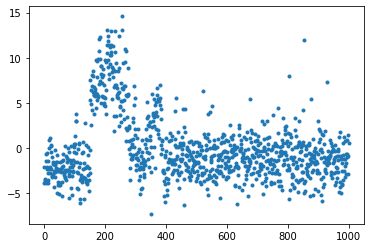

In [ ]:
plt.plot(X[0],'.') #setting up plot 

In [ ]:
X[0]

In [ ]:
np.argmax(X[0]) #determining max element within plot

256

In [ ]:
labels[256] #indicating what the max number represents 

'Newfoundland, Newfoundland dog'

In [ ]:
top_ten= np.argsort(X[0])[::-1][0:10]

In [ ]:
for i in top_ten: #indicating what the top 10 numbers represent 
  print(labels[i])

Newfoundland, Newfoundland dog
flat-coated retriever
Leonberg
Sussex spaniel
Border collie
Tibetan mastiff
Chesapeake Bay retriever
Border terrier
Staffordshire bullterrier, Staffordshire bull terrier
tennis ball


In [ ]:
labels

(array([ 20., 146., 356., 255.,  69.,  61.,  42.,  27.,  18.,   6.]),
 array([-7.330772 , -5.137972 , -2.9451714, -0.7523711,  1.4404292,
         3.6332295,  5.82603  ,  8.01883  , 10.21163  , 12.40443  ,
        14.597231 ], dtype=float32),
 <a list of 10 Patch objects>)

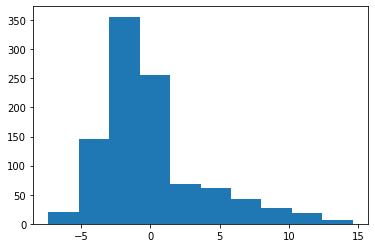

In [ ]:
plt.hist(X[0]) #printing histogram

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size): #determining normal distribution

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape #setiing up shape 

torch.Size([50, 1000])

In [ ]:
def get_batch(mode): #setting up function
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1"); #running data 
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


Best Run: 0.849
Worse Run: 0.531
Average Run: 0.733